# Data: London Ontario.

In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import RegexpTokenizer
## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jianhuili/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jianhuili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jianhuili/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jianhuili/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

## Q1 Sentiment Analysis and Aggregation

### a.

In [3]:
df=pd.read_csv("reviews.csv")
df.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [4]:

def evalSentences(sentences, to_df=False, columns=[]):
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [5]:
def sentiment_scores(sentence): 
   #The compound score is computed by summing the valence scores of each word in the lexicon, 
   #adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1
   #(most extreme positive).
    sid= SentimentIntensityAnalyzer() 
    sentiment_vader = sid.polarity_scores(sentence)['compound']
    return sentiment_vader

In [6]:
df['vader'] = df['reviewColumn'].apply(sentiment_scores)
df.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,data\ca\154995\10480112\587645076.html,Wharncliffe Suites,"""The d\u00E9cor is dated and tired, but the ro...",4,positive,0.8793
1,data\ca\154995\10480112\610671456.html,Wharncliffe Suites,"""We just returned from two nights there. The ...",3,negative,0.9619
2,data\ca\154995\10480112\664724643.html,Wharncliffe Suites,"""This is a friendly place to sleep. Family run...",4,positive,0.8908
3,data\ca\154995\10480112\702694387.html,Wharncliffe Suites,"""I wrote a fairly favorable review last year i...",2,negative,-0.9180
4,data\ca\154995\1200523\164066234.html,Super 7 Motel,"""The room was clean. Everything was functiona...",4,positive,0.6597


In [7]:
df.dropna().shape

(7971, 6)

### a.Compute average Vader sentiment and average ground truth rating per hotel

In [8]:
review_avgDF = df.groupby('hotelName')['ratingScore','vader'].mean().reset_index()

In [9]:
review_avgDF

,hotelName,ratingScore,vader
0,American Plaza Motel,2.142857,-0.002100
1,Best Western London Airport Inn &amp; Suites,4.145000,0.767849
2,Best Western Plus Lamplighter Inn &amp; Confer...,4.501818,0.841507
3,Best Western Plus Stoneridge Inn &amp; Confere...,4.192453,0.752429
4,Cardinal Court Motel,4.400000,0.928380
5,Clare Hall Residence,4.400000,0.748900
6,Comfort Inn,3.285714,0.560013
7,Comfort Inn St Thomas,3.584615,0.670945
8,"Country Inn &amp; Suites by Radisson, London S...",4.415385,0.852870
9,Courtyard London,4.020000,0.546010


### b.

In [10]:
hotelNames = df['hotelName'].unique()

def getHotelRank(df, measure='ratingScore'):
    #Rank the hotel by ground truth rating score
    hotelRating = []
    for hotel in hotelNames:
        itemDf = df.loc[df['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDfGt = pandas.DataFrame(hotelRating)
    hotelRatingDfGt.columns=['hotelName','avgRatingScore']
    hotelRatingDfGt = hotelRatingDfGt.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDfGt

In [11]:
hotelRatingDfGt = getHotelRank(df)

In [12]:
hotelRatingDfGt.head()

,hotelName,avgRatingScore
24,Rosneath Bed and Breakfast,5.000000
33,Idlewyld Inn &amp; Spa,4.731915
7,Hotel Metro,4.561905
9,Best Western Plus Lamplighter Inn &amp; Confer...,4.501818
23,TownePlace Suites by Marriott London,4.452632


In [13]:
hotelRatingDfGt.tail()

,hotelName,avgRatingScore
18,London Extended Stay,2.457143
3,American Plaza Motel,2.142857
31,Maple Glen Motel,1.666667
25,London Residency Inn,1.000000
43,Glen Haven,1.000000


In [14]:
hotelRatingDfVd = getHotelRank(df, measure='vader')

In [15]:
hotelRatingDfVd.head()

,hotelName,avgRatingScore
24,Rosneath Bed and Breakfast,0.970040
33,Idlewyld Inn &amp; Spa,0.931948
42,Cardinal Court Motel,0.928380
7,Hotel Metro,0.866835
28,Fanshawe College Conference Services,0.860192


In [16]:
hotelRatingDfVd.tail()

,hotelName,avgRatingScore
1,Super 7 Motel,0.214317
43,Glen Haven,0.080400
3,American Plaza Motel,-0.002100
31,Maple Glen Motel,-0.080133
25,London Residency Inn,-0.792900


Answer:
The top 5 and bottom 5 for both ranking methods agree well. Top 5 have 3 same hotels with a little different ranking order. As for the bottom 5 hotels, 4 of them are in both ranking metrics with a little different ranking order.

## Q2 Frequency Analysis
### a.

In [17]:
def top_k_words(truth, k, reviewDF,flag):
    if(flag==True):
        truth_df = reviewDF[reviewDF.groundTruth==truth]
    else:
        truth_df = reviewDF
    reviews = truth_df['reviewColumn'].values
    stop = set(stopwords)
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in reviews:
        counter.update([word.lower() for word in re.findall(r'\w+', review) if word.lower() not in stop and len(word) > 2])
        topk = counter.most_common(k)
    return topk

In [18]:
top_50_positive=top_k_words("positive", 50, df,True)

In [19]:
top_50_nagetive=top_k_words("negative", 50, df,True)

In [20]:
print("Top50 frequent words in positive reviews:")
print([word[0] for word in top_50_positive])
print("Top50 frequent words in negative reviews:")
print([word[0] for word in top_50_nagetive])

Top50 frequent words in positive reviews:
['great', 'clean', 'breakfast', 'good', 'london', 'would', 'nice', 'friendly', 'comfortable', 'stayed', 'well', 'pool', 'one', 'service', 'area', 'time', 'place', 'night', 'location', 'food', 'desk', 'helpful', 'excellent', 'front', 'bed', 'nthe', 'restaurant', 'also', 'recommend', 'like', 'check', 'definitely', 'parking', 'back', 'quiet', 'free', 'really', 'always', 'close', 'get', 'could', 'best', 'everything', 'family', 'hot', 'beds', 'little', 'day', 'even', 'large']
Top50 frequent words in negative reviews:
['would', 'one', 'breakfast', 'night', 'good', 'desk', 'clean', 'front', 'stayed', 'could', 'get', 'bed', 'nice', 'like', 'time', 'nthe', 'place', 'back', 'door', 'pool', 'even', 'london', 'check', 'floor', 'told', 'also', 'great', 'well', 'friendly', 'bathroom', 'next', 'people', 'first', 'parking', 'area', 'service', 'location', 'comfortable', 'morning', 'said', 'old', 'went', 'booked', 'day', 'never', 'price', 'got', 'really', 'small

Answer:Do you note anything interesting and/or locale-specific about these top-ranked words?

The Both top50 words in positive and negative reviews contain some same nouns such as breakfast, clean,desk and location.
In positive reviews, most adjectives are positive such as great,comfortable,friendly. But, some of the frequent adjectives in negative reviews are also positive. It's maybe because these words are negated (e.g."not clean","not good"). 

### b. for the top-50 noun phrases

In [21]:
tagger = PerceptronTagger()
pos_tag = tagger.tag
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

In [22]:
# Noun Phrase Extraction Support Functions

lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in set(stopwords))
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term
# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [23]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
def top_k_phrases(k, df,label='all'):
    if label=='all':
        reviews = df['reviewColumn'].values
    else:
        reviews = df[df['groundTruth']==label]['reviewColumn'].values
    stop = set(stopwords)
    counter = Counter()
    for review in reviews:
        # review = ' '.join(x for x in review.split() if x not in stop)
        counter.update(word for word in flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]) if word not in stop)
        topk = counter.most_common(k)
    return topk


In [24]:
top50_phrase_positive = top_k_phrases(50, df,"positive")

KeyboardInterrupt: 

In [ ]:
top50_phrase_negative = top_k_phrases(50, df,"negative")

In [ ]:
print("Top50 frequent noun phrases in positive reviews:")
print([word[0] for word in top50_phrase_positive])
print("\nTop50 frequent noun phrases in negative reviews:")
print([word[0] for word in top50_phrase_negative])

Similarly, frequent noun phrase in positive reviews includes most of postive words,like great place, great stay, free breakfast, and clean staff.
From the negative reives, some complaints can be concluded since it contains most of facility phrases such as 
pool area, front desk, hot tub, coffe maker.
However, there is some thing so interesting, such as comfort inn. that's because, the hotel name is comfort inn. No matter negative or postive reviews, they all include this phrase. But it also includes some phrase like clean room, good thing. This may come from not clean room. 

## Q3. Mutual Information
### a.


In [25]:
def dataFrameTransformation(df, topK,mode):
    reviews = df['reviewColumn'].values
    tokenizer = RegexpTokenizer(r'\w+')
    freqReview = []
    if mode == 'word':
        for review in reviews:
            tempCounter = Counter([word.lower() for word in tokenizer.tokenize(review)])
            topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topK]
            freqReview.append(topkinReview)
    elif mode=='phrase':
        grammar = r"""
            NBAR:
                {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
            NP:
                {<NBAR>}
                {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
        """
        chunker = nltk.RegexpParser(grammar)
        tagger = PerceptronTagger()
        pos_tag = tagger.tag
        for review in reviews:
            tempCounter = Counter(flatten([word 
                                           for word 
                                           in get_terms(chunker.parse(pos_tag(tokenizer.tokenize(review))))]))
            topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topK]
            freqReview.append(topkinReview)
        
            
    #Find out if a particular review has the word from topk list
    for review in reviews:
        tempCounter = Counter([word for word in tokenizer.tokenize(review.lower())])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topK]
        freqReview.append(topkinReview)

    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []

    freqReviewDf.columns = [c[0] for c in topK]
    finalreviewDf = df.join(freqReviewDf)
    return finalreviewDf

In [26]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [27]:
topk=top_k_words(" ", 50, df,False)

In [30]:
topk

[('great', 3948),
 ('clean', 3882),
 ('breakfast', 3503),
 ('would', 3224),
 ('good', 3109),
 ('london', 2758),
 ('nice', 2642),
 ('stayed', 2507),
 ('friendly', 2417),
 ('one', 2284),
 ('comfortable', 2226),
 ('pool', 2008),
 ('well', 2006),
 ('night', 1985),
 ('desk', 1864),
 ('time', 1770),
 ('area', 1719),
 ('service', 1718),
 ('front', 1681),
 ('place', 1670),
 ('bed', 1546),
 ('location', 1515),
 ('nthe', 1424),
 ('like', 1406),
 ('food', 1402),
 ('helpful', 1342),
 ('also', 1340),
 ('get', 1311),
 ('could', 1303),
 ('check', 1278),
 ('excellent', 1237),
 ('back', 1234),
 ('restaurant', 1186),
 ('parking', 1142),
 ('recommend', 1096),
 ('really', 1055),
 ('even', 1047),
 ('free', 1004),
 ('close', 983),
 ('quiet', 966),
 ('day', 958),
 ('next', 958),
 ('definitely', 946),
 ('beds', 942),
 ('little', 941),
 ('hot', 934),
 ('best', 905),
 ('family', 893),
 ('two', 866),
 ('price', 866)]

In [28]:
finaldf_topk = dataFrameTransformation(df,topk, "word")


In [29]:
finaldf_topk

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader,great,clean,breakfast,would,...,day,next,definitely,beds,little,hot,best,family,two,price
0,data\ca\154995\10480112\587645076.html,Wharncliffe Suites,"""The d\u00E9cor is dated and tired, but the ro...",4,positive,0.8793,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,data\ca\154995\10480112\610671456.html,Wharncliffe Suites,"""We just returned from two nights there. The ...",3,negative,0.9619,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,data\ca\154995\10480112\664724643.html,Wharncliffe Suites,"""This is a friendly place to sleep. Family run...",4,positive,0.8908,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
3,data\ca\154995\10480112\702694387.html,Wharncliffe Suites,"""I wrote a fairly favorable review last year i...",2,negative,-0.9180,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
4,data\ca\154995\1200523\164066234.html,Super 7 Motel,"""The room was clean. Everything was functiona...",4,positive,0.6597,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,data\ca\499265\262716\735431777.html,Comfort Inn,"""Stayed for one night on our trip up north for...",3,negative,0.9287,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
7967,data\ca\499265\262716\7374236.html,Comfort Inn,"""My Stay here was great. From the moment I wa...",5,positive,0.7506,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7968,data\ca\499265\262716\79398479.html,Comfort Inn,"""I stayed overnight on Sept 11 after attending...",4,positive,0.9941,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
7969,data\ca\499265\262716\8429744.html,Comfort Inn,"""This Comfort Inn and Suites is by far the nic...",5,positive,0.8977,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
miScoredf = getMI(topk, finaldf_topk)

In [42]:
miScoredf

,Word,MI Score
0,great,2.362387e-02
30,excellent,1.510274e-02
27,get,1.038087e-02
28,could,9.576161e-03
8,friendly,8.932551e-03
13,night,8.840348e-03
10,comfortable,7.269147e-03
42,definitely,6.743282e-03
14,desk,6.536378e-03
5,london,6.234162e-03


(mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. If mutual information is zero, it gives nothing about Y.) Y is ground truth, X is the topk words.

The list contains both postive and negative reviews, so it is hard to determine the noun is a complaint or a praise. The adjectives are mostly postive.


### b.top-50 noun phrase

In [44]:
top50_phrase = top_k_phrases(50, df)
finaldf_ph = dataFrameTransformation(df,top50_phrase, "phrase")



In [46]:
miScorePF_df=getMI(top50_phrase, finaldf_ph)

In [47]:
miScorePF_df

,Word,MI Score
0,front desk,4.474138e-03
9,park lot,2.792950e-03
17,great stay,2.640577e-03
5,great place,1.884429e-03
29,great hotel,1.575231e-03
35,great experi,1.567376e-03
23,next day,1.513742e-03
44,great valu,1.311846e-03
3,london ontario,1.148775e-03
47,second floor,9.120418e-04



We can see that no matter the review is positive or negative , most tourists care about the front desk service most. in othere words, the front desk service decides if it is the positive or negative review.

## Q4. Pointwise Mutual Information
### a.

In [41]:
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = (sum(df['groundTruth']==i))/(len(df))
            py = (sum(df[x]==j))/(len(df))
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0: # Log 0 cannot happen
                if px*py==0:
                    pmi = math.log((pxy+0.0001)/(px*py+0.00001))
                else:
                    pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf


# Simple example of getting pairwise mutual information of a term
# def pmiCal(df, x):
#     pmilist=[]
#     for i in ['positive','negative']:
#         for j in [0,1]:
#             px = sum(df['groundTruth']==i)/len(df)
#             py = sum(df[x]==j)/len(df)
#             pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
#             if pxy==0:#Log 0 cannot happen
#                 pmi = math.log((pxy+0.0001)/(px*py))
#             else:
#                 pmi = math.log(pxy/(px*py))
#             pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
#     pmidf = pandas.DataFrame(pmilist)
#     pmidf.columns = ['x','y','px','py','pxy','pmi']
#     return pmidf

In [42]:
def pmiIndivCal(df, x, gt, label_column='groundTruth'):
    px = (sum(df[label_column]==gt))/(len(df))
    py = (sum(df[x]==1))/(len(df))
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)

    if pxy==0: #Log 0 cannot happen
        if px*py==0:
            pmi = math.log((pxy+0.0001)/(px*py+0.00001))
        else:
            pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf





# def pmiIndivCal(df,x,gt, label_column='groundTruth'):
#     px = sum(df[label_column]==gt)/len(df)
#     py = sum(df[x]==1)/len(df)
#     pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
#     if pxy==0:#Log 0 cannot happen
#         pmi = math.log((pxy+0.0001)/(px*py))
#     else:
#         pmi = math.log(pxy/(px*py))
#     return pmi

In [39]:
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf



####  (i) positive reviews.

In [43]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_topk,topk)


100%|██████████| 50/50 [00:01<00:00, 28.79it/s]


In [237]:
pmiposlist.sort_values('pmi',ascending=0).head(5)

,word,pmi
30,excellent,0.186443
42,definitely,0.144332
0,great,0.136652
34,recommend,0.125215
25,helpful,0.117188


####  (ii) negative reviews.

In [238]:
pmineglist.sort_values('pmi',ascending=0).head(10)

,word,pmi
27,get,0.553251
28,could,0.540876
36,even,0.463392
13,night,0.428102
23,like,0.393643
14,desk,0.382684
18,front,0.364990
41,next,0.347571
9,one,0.342171
20,bed,0.310052


Pointwise mutual information (PMI) is a correlation measure for two events, x and y; mutual information measures the pointwise mutual information over all possible events: that is, MI is the expectation (average) of PMI over all possible outcomes. Here, we have two possible events: negative and positive reviews.


Top positive rankings tell us all the positive words.  From top negative rankings, i didn't get much useful information. only desk and bed make cause the negative reviews easily.


### b. for the top-50 noun phrases 

#### i) positive reviews

In [106]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_ph,top50_phrase)

100%|██████████| 50/50 [00:01<00:00, 32.82it/s]


In [107]:
pmiposlist.sort_values('pmi',ascending=0).head(5)

,word,pmi
17,great stay,0.230624
35,great experi,0.225378
44,great valu,0.223099
29,great hotel,0.214875
43,great time,0.191403


#### ii) negative reviews

In [108]:
pmineglist.sort_values('pmi',ascending=0).head(5)

,word,pmi
9,park lot,0.850859
23,next day,0.741659
47,second floor,0.719830
46,hockey team,0.627715
25,hockey tournament,0.543834



Top positive rankings tell us that people like hotels with great stay, great expeience, and great value.
The top negative noun phrase is credit card. People may complain about the park lot, second floor.

### c. analysis for the single top and single bottom hotel

In [77]:
top_hotel = review_avgDF.sort_values('ratingScore',ascending=False).head()
top_hotel

,ratingScore,vader
hotelName,,
Rosneath Bed and Breakfast,5.000000,0.970040
Idlewyld Inn &amp; Spa,4.731915,0.931948
Hotel Metro,4.561905,0.866835
Best Western Plus Lamplighter Inn &amp; Conference Centre,4.501818,0.841507
TownePlace Suites by Marriott London,4.452632,0.806967


In [135]:
hotel_topdf=df[df['hotelName']=='Idlewyld Inn &amp; Spa'].reset_index()
hotel_topdf

,index,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,5827,data\ca\154995\5986398\206359261.html,Idlewyld Inn &amp; Spa,"""I recently had business in the London area an...",5,positive,0.9767
1,5828,data\ca\154995\5986398\207152473.html,Idlewyld Inn &amp; Spa,"""Hosted a dinner party for six in the restaura...",5,positive,0.9221
2,5829,data\ca\154995\5986398\207746395.html,Idlewyld Inn &amp; Spa,"""This is a wonderful location for dining and r...",5,positive,0.9798
3,5830,data\ca\154995\5986398\208227152.html,Idlewyld Inn &amp; Spa,"""My wife and I enjoyed a wonderful 33d wedding...",5,positive,0.9765
4,5831,data\ca\154995\5986398\208524120.html,Idlewyld Inn &amp; Spa,"""Whoever did these renovations ought to be con...",5,positive,0.9663
...,...,...,...,...,...,...,...
230,6057,data\ca\154995\5986398\736318738.html,Idlewyld Inn &amp; Spa,"""Once again our expectations were exceeded at ...",5,positive,0.9812
231,6058,data\ca\154995\5986398\745679810.html,Idlewyld Inn &amp; Spa,"""The building is lovely and is located in a ni...",3,negative,0.8780
232,6059,data\ca\154995\5986398\747320693.html,Idlewyld Inn &amp; Spa,"""My sister, niece, and myself had the Pajama P...",5,positive,0.9803
233,6060,data\ca\154995\5986398\748346421.html,Idlewyld Inn &amp; Spa,"""We really enjoyed our stay at this property. ...",5,positive,0.9613


In [136]:
bad_hotel = review_avgDF.sort_values('ratingScore',ascending=True).head()
bad_hotel

,ratingScore,vader
hotelName,,
Glen Haven,1.000000,0.080400
London Residency Inn,1.000000,-0.792900
Maple Glen Motel,1.666667,-0.080133
American Plaza Motel,2.142857,-0.002100
London Extended Stay,2.457143,0.256311


In [139]:
hotel_bottomdf=df[df['hotelName']=='American Plaza Motel'].reset_index()
hotel_bottomdf

,index,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,65,data\ca\154995\1389958\126595789.html,American Plaza Motel,"""shoddy repairs, bed bugs run rampant, windows...",1,negative,0.6808
1,66,data\ca\154995\1389958\130499679.html,American Plaza Motel,"""Got the Honeymoon suite . . . . was very clea...",5,positive,0.9152
2,67,data\ca\154995\1389958\388665710.html,American Plaza Motel,"""This place is a crap hole. Mattresses laying ...",1,negative,-0.9110
3,68,data\ca\154995\1389958\587449131.html,American Plaza Motel,"""Booked this place the day I was traveling and...",1,negative,-0.9698
4,69,data\ca\154995\1389958\658342059.html,American Plaza Motel,"""This motel was the most terrible place that I...",1,negative,-0.9833
5,70,data\ca\154995\1389958\711447610.html,American Plaza Motel,"""We selected the above as we travelled by , lo...",2,negative,0.5411
6,71,data\ca\154995\1389958\747475020.html,American Plaza Motel,"""the owner and his familey were very polite an...",4,positive,0.7123


In [140]:
topk_word_top=top_k_words(" ", 50, hotel_topdf,False)
finaldf_top= dataFrameTransformation(hotel_topdf,topk_word_top,mode='word')
topk_word_topNP=top_k_phrases(50, hotel_topdf)
finaldf_topNP= dataFrameTransformation(hotel_topdf,topk_word_topNP,mode='phrase')

topk_word_bot=top_k_words(" ", 50, hotel_bottomdf,False)
finaldf_bot= dataFrameTransformation(hotel_bottomdf,topk_word_bot,mode='word')
topk_word_botNP=top_k_phrases(50,hotel_bottomdf)
finaldf_botNP= dataFrameTransformation(hotel_bottomdf,topk_word_botNP,mode='phrase')

In [141]:
pmiposlist_top, pmineglist_top, pmidf_top = pmiForAllCal(finaldf_top,topk_word_top)
pmiposlist_bot, pmineglist_bot, pmidf_bot = pmiForAllCal(finaldf_bot,topk_word_bot)

pmiposlist_topPhrase, pmineglist_topPhrase, pmidf_topPhrase = pmiForAllCal(finaldf_topNP,topk_word_topNP)
pmiposlist_botPhrase, pmineglist_botPhrase, pmidf_botPhrase = pmiForAllCal(finaldf_botNP,topk_word_botNP)

100%|██████████| 34/34 [00:00<00:00, 86.88it/s]


In [142]:
pmineglist_top.sort_values('pmi',ascending=0).head(5)

,word,pmi
21,front,0.898716
22,night,0.895237
39,desk,0.874618
41,could,0.839527
30,experience,0.792380


In [143]:
pmiposlist_bot.sort_values('pmi',ascending=0).head(5)

,word,pmi
21,expect,1.252763
19,got,1.252763
36,find,0.559616
20,even,0.559616
39,nothing,0.559616


In [148]:
######## noun phase


In [149]:
pmiposlist_topPhrase.sort_values('pmi',ascending=0).head(5)

,word,pmi
0,idlewyld inn,0.061423
26,good choic,0.061423
28,guest room,0.061423
29,hotel restaur,0.061423
30,front porch,0.061423


In [145]:
pmineglist_topPhrase.sort_values('pmi',ascending=0).head(5)

,word,pmi
45,bliss packag,2.415063
35,common area,1.721916
21,nthe staff,1.434234
18,night stay,1.434234
23,wed day,1.434234


In [150]:
pmiposlist_botPhrase.sort_values('pmi',ascending=0).head(5)

,word,pmi
33,cant expect visitor,1.252763
7,honeymoon suit,1.252763
8,cute servic,1.252763
9,cheap rate,1.252763
32,night cleaner,1.252763


In [151]:
pmineglist_botPhrase.sort_values('pmi',ascending=0).head(5)

,word,pmi
0,terribl place,0.336472
1,shoddi repair,0.336472
31,resid spoke,0.336472
30,horror movi,0.336472
29,write review,0.336472


for review of the top hotel: Idlewyld Inn &amp; Spa. We know people like it, and recommend it as a good choice. this hotel should has a good guest room and restaurant. But we also know it has some weakness, like its stuff, common area.  For the review os bottom hotel: American Plaza Motel. People feel it is cheap, its honeymoon suit is not bad. But people think it is a terrible place.

## Q5. General Plots

### (a) Histogram
#### a.

In [156]:
def getHistogram(df,measure, title):
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].values)
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

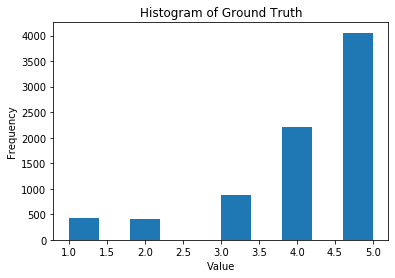

In [157]:
getHistogram(df,'ratingScore', 'Histogram of Ground Truth')

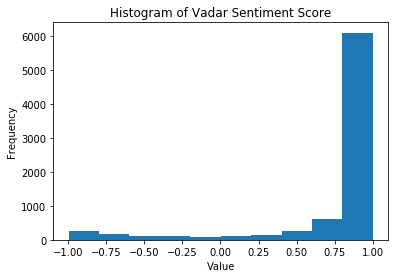

In [159]:
getHistogram(df, 'vader', 'Histogram of Vadar Sentiment Score')

Answer:Vadar sentiment score match the value score. Therefore, we can see people give their fair comment, and score. Besides, positive reviews is more than negative reviews. It make senses because most hotel comfort people. 

#### (b) Show a histogram of the number of reviews per hotel.

Text(0.5, 1.0, 'Distribution of the Reviews over All Hotels')

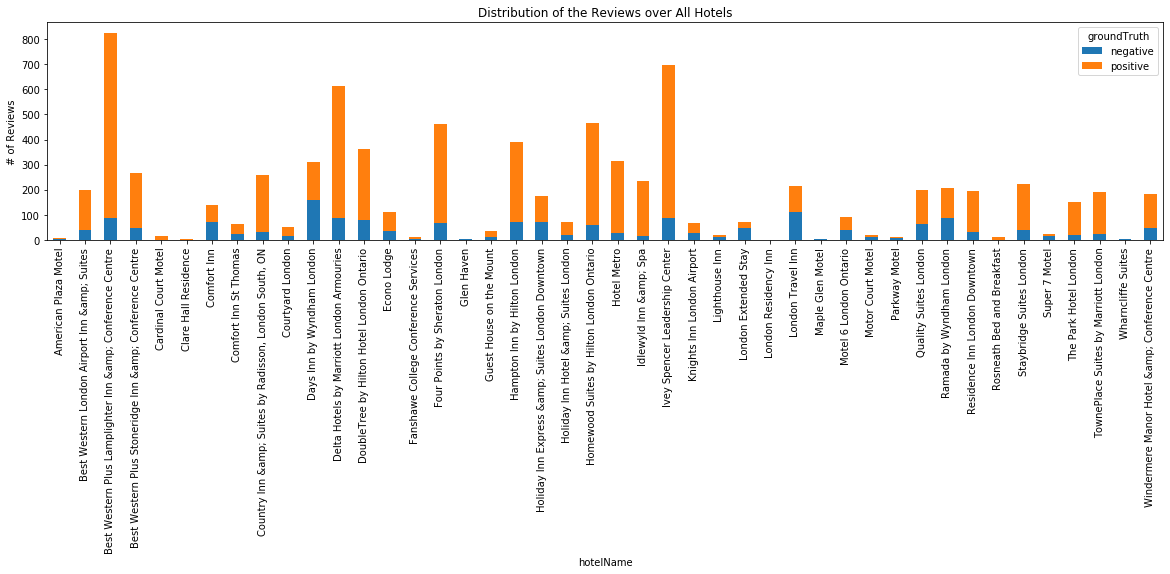

In [168]:
review_hotel=df.groupby(['hotelName', 'groundTruth']).size().unstack('groundTruth').fillna(0)
review_hotel.plot(kind='bar', stacked=True,figsize=(20,4))

plt.ylabel('# of Reviews')
plt.title('Distribution of the Reviews over All Hotels')

answer: positive reviews are more than negative reviews. And only five hotels have reviews more than 400. London is a small city, so there are only several nice and big hotels.

### b. box plot
#### a.  one for ground truth star rating and one for Vader sentiment

In [197]:
tp5gthotel=hotelRatingDfGt["hotelName"][0:5].values

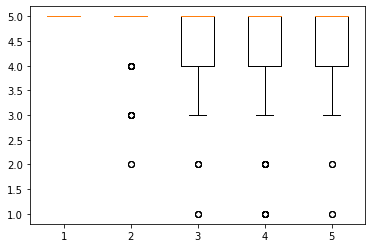

In [199]:

#Plot top 5 side-by-side boxplot for top 5 ground truth rated hotel


greeenwood = df.loc[df['hotelName'] == tp5gthotel[0]]['ratingScore']
cherryplace = df.loc[df['hotelName'] == tp5gthotel[1]]['ratingScore']
whitneymanor = df.loc[df['hotelName'] == tp5gthotel[2]]['ratingScore']
secretgarden = df.loc[df['hotelName'] == tp5gthotel[3]]['ratingScore']
greenacres = df.loc[df['hotelName'] == tp5gthotel[4]]['ratingScore']

data = [greeenwood, cherryplace, whitneymanor, secretgarden, greenacres]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

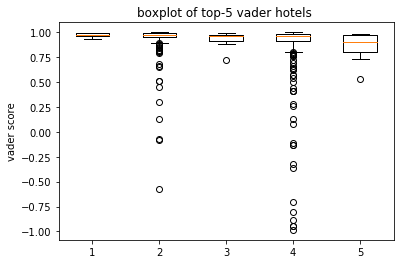

In [201]:
#Plot top 5 side-by-side boxplot for top 5 vader sentiment hotel
tp5gthotel_vd=hotelRatingDfVd["hotelName"][0:5].values

cherryplace = df.loc[df['hotelName'] == tp5gthotel_vd[0]]['vader']
greeenwood = df.loc[df['hotelName'] == tp5gthotel_vd[1]]['vader']
secretgarden = df.loc[df['hotelName'] == tp5gthotel_vd[2]]['vader']
greenacres = df.loc[df['hotelName'] == tp5gthotel_vd[3]]['vader']
rosemount = df.loc[df['hotelName'] == tp5gthotel_vd[4]]['vader']

data = [ cherryplace,greeenwood,  secretgarden, greenacres,rosemount ]
# multiple box plots on one figure
plt.figure()
plt.title('boxplot of top-5 vader hotels ')
plt.ylabel('vader score')
plt.boxplot(data)
plt.show()

#### b. Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels 


In [206]:

hotelReview_top5DF = df[df['hotelName'].isin(tp5gthotel.tolist())]
hotelReview_top5DF.groupby('hotelName').mean()[['ratingScore','vader']].sort_values('ratingScore',ascending=0)

,ratingScore,vader
hotelName,,
Rosneath Bed and Breakfast,5.000000,0.970040
Idlewyld Inn &amp; Spa,4.731915,0.931948
Hotel Metro,4.561905,0.866835
Best Western Plus Lamplighter Inn &amp; Conference Centre,4.501818,0.841507
TownePlace Suites by Marriott London,4.452632,0.806967


In [207]:
hotelReview_top5DF.groupby('hotelName').std()[['ratingScore','vader']].sort_values('ratingScore',ascending=0)

,ratingScore,vader
hotelName,,
Best Western Plus Lamplighter Inn &amp; Conference Centre,0.850647,0.336099
TownePlace Suites by Marriott London,0.839103,0.367984
Hotel Metro,0.776943,0.309736
Idlewyld Inn &amp; Spa,0.606625,0.169306
Rosneath Bed and Breakfast,0.000000,0.022828


#### c. Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?
Answer: box plot includes maximum,third quertile, median, first quertile, minimum and outliers. 
top 5 hotel have very high score, both shown from box plot, and mean. They are equally informative, large std, has more outliers or big area of box. 

But box plot make more senses since it excludes the outliers while variance consider outlier. Outliers may have large effect to the mean since the sample is small.

vader score:
positive sentiment: compound score >= 0.05
neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
negative sentiment: compound score <= -0.05

### (c) Scatterplots and heatmaps

#### (a) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score.

Text(0.5, 0, 'Vader Score')

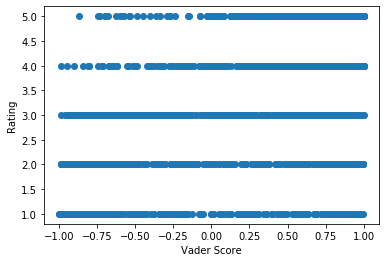

In [209]:
y = df['ratingScore'].values
x = df['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

Text(0, 0.5, 'Rating')

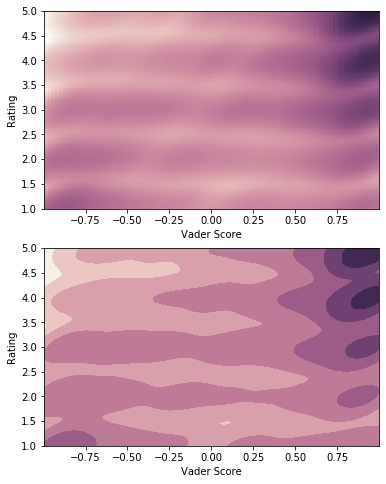

In [210]:
# Show the heatmap of ground truth score (star rating) versus Vader sentiment score.

from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

question: Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?

answer:
High rating(4-5) most likely corresponds to postive comment(the drak area on the top right). And we can see that with rating lower than 3.5, half of the comments are not nice while others are comparatively acceptable.

#### (b) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score.

In [222]:
df['reviewLength'] = df['reviewColumn'].apply(lambda x:len(x.split()))

In [223]:
# df['reviewLength']=df["reviewColumn"].apply(lambda x: len(x))

Text(0.5, 0, 'Review Length')

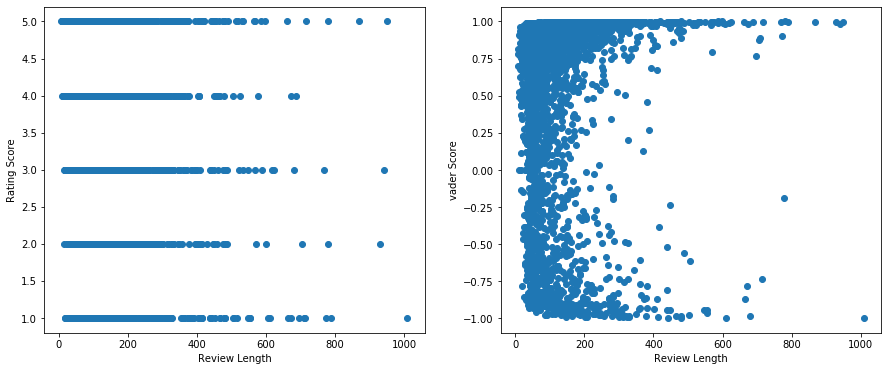

In [224]:

y = df['reviewLength'].values
x1 = df['ratingScore'].values
x2 = df['vader'].values

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot( y,x1,"o")
ax2.plot( y,x2,"o")

ax1.set_ylabel('Rating Score')
ax1.set_xlabel('Review Length')

ax2.set_ylabel('vader Score')
ax2.set_xlabel('Review Length')

Text(0, 0.5, 'Vader Score')

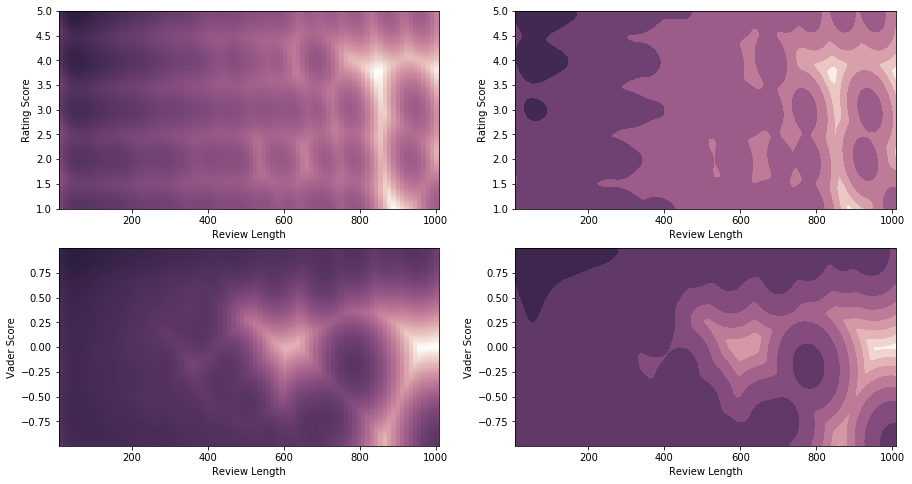

In [225]:
x = df['reviewLength'].values
y_vr = df['vader'].values
y=df['ratingScore'].values

kv = gaussian_kde(np.vstack([x, y_vr]))
xiv, yiv = np.mgrid[x.min():x.max():x.size**0.5*1j,y_vr.min():y_vr.max():y_vr.size**0.5*1j]
ziv = kv(np.vstack([xiv.flatten(), yiv.flatten()]))

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax3.pcolormesh(xiv, yiv, np.log10(ziv.reshape(xiv.shape)), cmap=cmap)
ax4.contourf(xiv, yiv, np.log10(ziv.reshape(xiv.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())
ax3.set_xlim(x.min(), x.max())
ax3.set_ylim(y_vr.min(), y_vr.max())
ax4.set_xlim(x.min(), x.max())
ax4.set_ylim(y_vr.min(), y_vr.max())

ax1.set_xlabel('Review Length')
ax1.set_ylabel('Rating Score')

ax2.set_xlabel('Review Length')
ax2.set_ylabel('Rating Score')

ax3.set_xlabel('Review Length')
ax3.set_ylabel('Vader Score')

ax4.set_xlabel('Review Length')
ax4.set_ylabel('Vader Score')

Trend:
The scatter and heatmaps indicate that most positive and negative reviews are tend to have long review length. Some extremely positive reviews have very long review length.

#### (c) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. 

Text(0.5, 0, '# of Reviews')

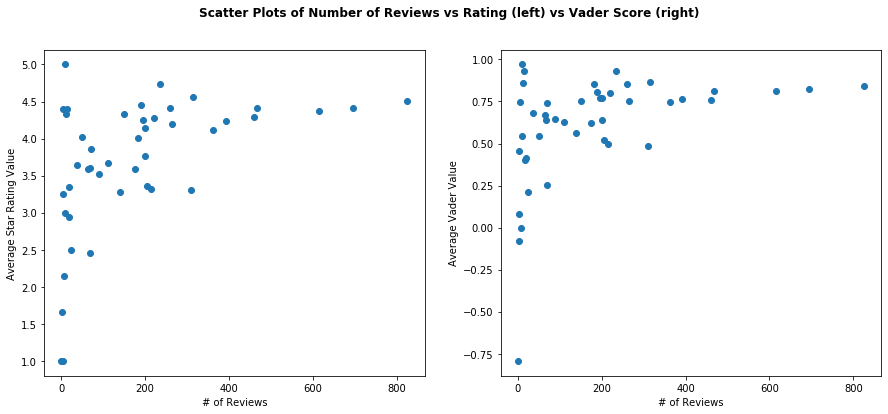

In [229]:
review_count = df.groupby('hotelName').size().tolist()

x = np.array(review_count)
y = hotelRatingDfGt.sort_values('hotelName',ascending=1)['avgRatingScore'].values
y_v = hotelRatingDfVd.sort_values('hotelName',ascending=1)['avgRatingScore'].values


fig = plt.figure(figsize=(15,6))
plt.suptitle('Scatter Plots of Number of Reviews vs Rating (left) vs Vader Score (right)', fontweight='bold')

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x, y,"o")
ax1.set_ylabel('Average Star Rating Value')
ax1.set_xlabel('# of Reviews')

ax2.plot(x, y_v,"o")
ax2.set_ylabel('Average Vader Value')
ax2.set_xlabel('# of Reviews')

Trend: high scores has more reviews. For low score, people don't like to comment much or debunk, instead, just give low socre. 